<a href="https://colab.research.google.com/github/Reasmey/UTS_ML2019_ID10845345/blob/master/Reasmey_Tith10845345_ADAA_AT2_SPR19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Employee Attrition

*Reasmey Tith 10845345 - ADAA 32513 Machine Learning Spring 2019*



## Why do people leave their jobs?

**Intro: define problem, justify significance (200)**

In modern society is it becoming more common for people to have multiple jobs and/or careeers over their working life. According to a survey conducted by the Australain Bureau of statistics (ABS), over 1 million people changed jobs in Australia from February 2017-2018 [1]. There may be many reasons why people choose to leave their current work including;

* dissatisfaction in the workplace, 
* wanting an increase in salary, 
* or a better chance at career growth. 

## Why do we care about attrition?
For Human Resources departments, the cost of losing employees can be substantial if the turnover rate is high. It costs more to advertise and hire a new employee than to retain employees at an increased salary, up to 1.5-2 times the annual salary [2]. There can also be potential conflicts if new hires are given a different salary to exisiting employees, thus increasing turnover.

It takes time for a company to return to the productivity experienced previously when a new employee is hired. It can be difficult to find replacment staff, particularly for highly skilled, long tenure employees. Often high attrition is also associated with financial loss and downsizing where the company can no longer afford to keep people on. This can lower morale in a company and potentially cause a domino affect as the existing employees take on more work or responsibilty, lowering satifaction at work overall.
It is in a company's best interest to keep attrition low in order to maintain productivity and prosperity.

## Measuring attrition

HR departments have records of all employees and will analyse the data in periodic increments to assess the personnel health of a company. Surveys are often conducted to measure employee satisfaction or engagement whilst working at the comapny, but once they leave an exit survey can also be undertaken. Exit surveys can provide valuable information on what factors attribute to a person leaving a company, and when combinded with employee data can provide a rich source of information. The attrition rate is calculated using the formula shown below:

Attrition rate = (the number of employees who have left/ average number of employees)*100

This report will attempt to predict whether employees have left a company by attrition or not, and look at what varibles contribute to attrition. The dataset used in this report is the IBM HR Analytics Employee Atrrition and Performance dataset from kaggle. HR data is sensitive in nature and highly identifying, so to protect the privacy and interests of employees and their company there are limited publicly available real world datasets. The IBM dataset is a simulated dataset.


# Exploring the HR data


**Exploration: Identify challenges, designdata structures/ plan data model and tests (300)**

In this section we will explore the data and summarise key statistics, as well as visualise trends amongst some of the key variables. It is possible to find valuable insights in the exploratory phase that can drive decision making. This exploration will also assist in preparing the data for predictive modelling.

In [41]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

# import dataset
url = 'https://raw.githubusercontent.com/Reasmey/UTS_ML2019_ID10845345/master/WA_Fn-UseC_-HR-Employee-Attrition.csv'
# read in the data from github
hr_data = pd.read_csv(url)
# examine the data
hr_data.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [42]:
# check for missing values
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [43]:
# no missing values, since this is a simulated dataset.
# check the size of the data
# Check the structure of data
print(hr_data.shape)
hr_data.dtypes

(1470, 35)


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are 35 variables in the dataset with observations from 1470 employee records. There are no incomplete records, however if there were they would need to be dealt with. 

In the table below we can see the distribution of numeric variables in the dataset. 

In [44]:
# describe the numeric data
hr_data.describe(include=[np.number])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The average hourly rate is $65.89, average number of companies worked for is 2.7, and average number of years in company is 7. The table below shows the distribution of categorical variables. 

In [45]:
# and object data
hr_data.describe(exclude=[np.number])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [46]:
# get proportion of attrition 
hr_data['Attrition'].value_counts()/1470*100

# attrition rate is 16%


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

The attrition rate is around 16%. This ratio of no or yes to attrition demonstrates a class imbalance which will need to be accounted for when modelling. There are also three columns where the observations are the same value for the whole dataset (Employee Count, Over 18 and Standard Hours). We will remove these three columns.

In [47]:
# double check the value counts for removing variables
print(hr_data['Over18'].value_counts())
print(hr_data['EmployeeCount'].value_counts())
print(hr_data['StandardHours'].value_counts())


# drop the variables
hr_data=hr_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
# check that it worked
hr_data.head()

Y    1470
Name: Over18, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


To compare the distribution of variables with respect to attrition, we can compare the mean of each variable for attrition "yes" or "no".

In [11]:
# crosstab comparisons of attrition yes and no vs numeric variables
hr_data.groupby('Attrition').mean()

# those mean income for those who left is approx $2000 lower than those who didn't, but monthly rate is higher?
# mean age of attrition is lower? look at this in more depth
# distance from home is larger for attrition
# job level is lower

# performance rating is almost the same, so is job satisfaction, salary hike, work/life balance, things you would think may contribute to attrition


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


The average monthly income for those who left the company is approximately $2000 lower than those who didn't. The daily rate is also slightly lower, although the monthly rate is higher. To get a better idea of the distribution of variables we can make density plots and bar graphs of the variables.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


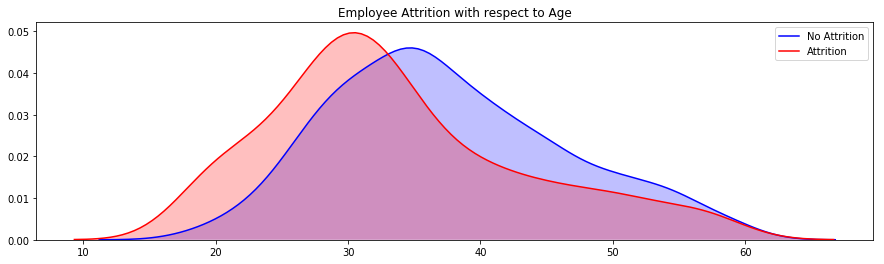

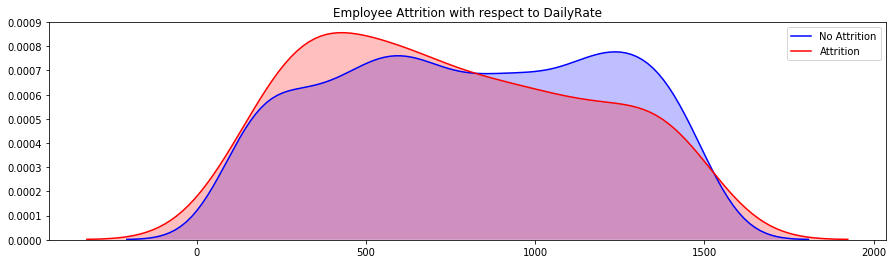

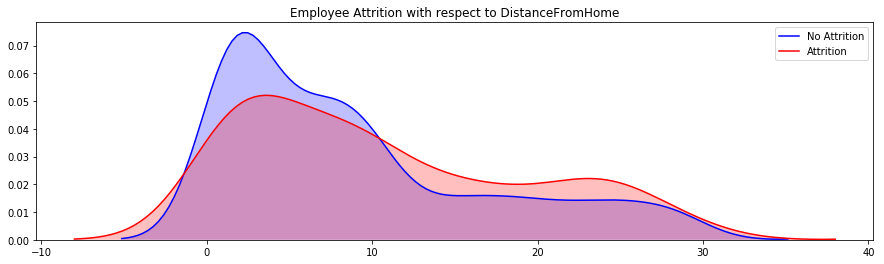

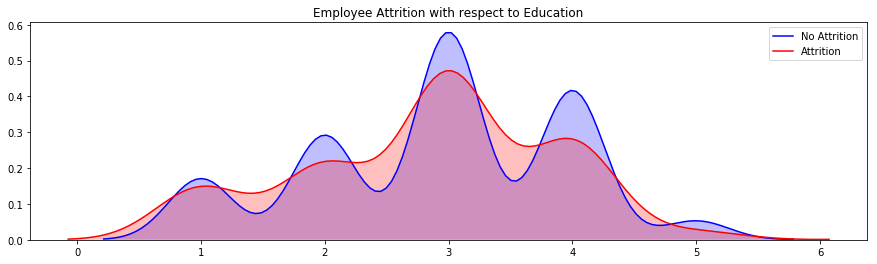

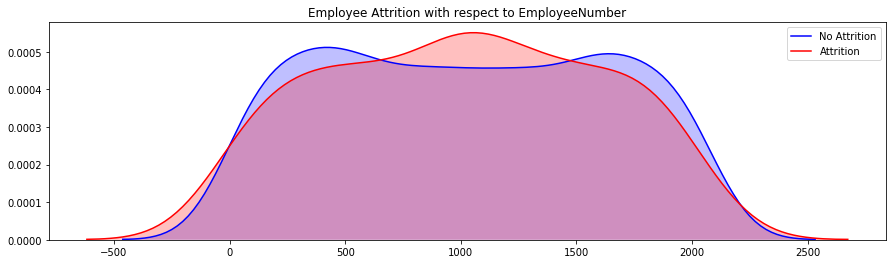

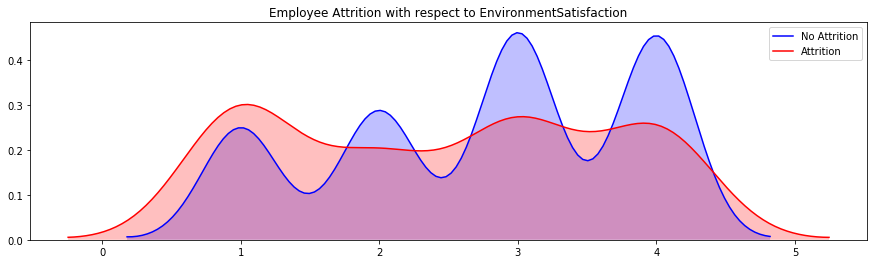

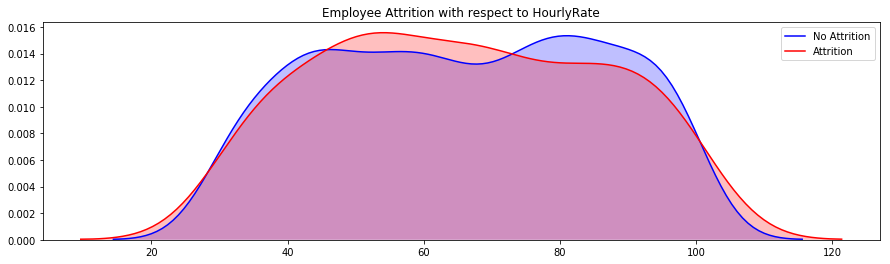

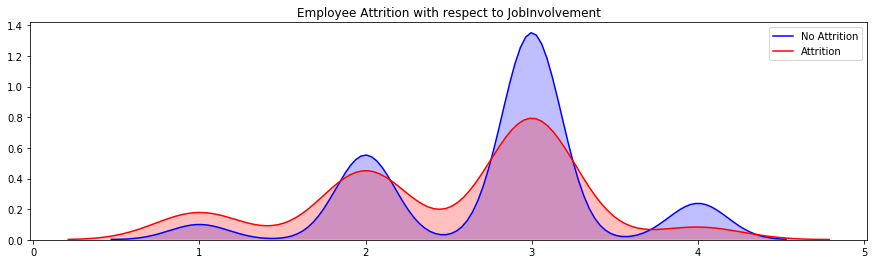

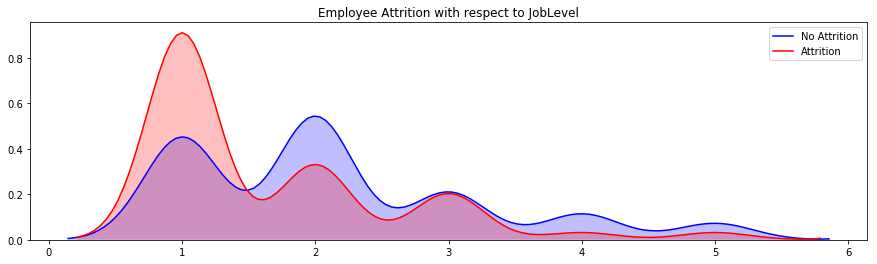

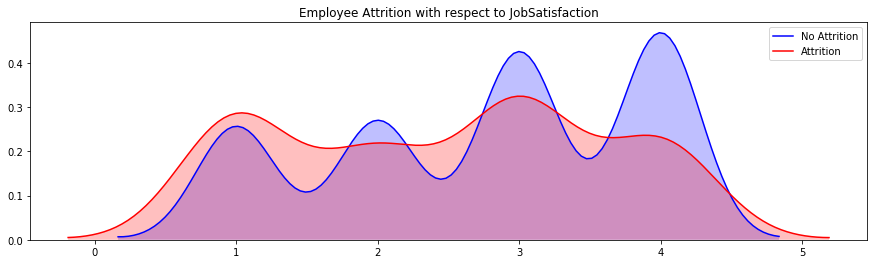

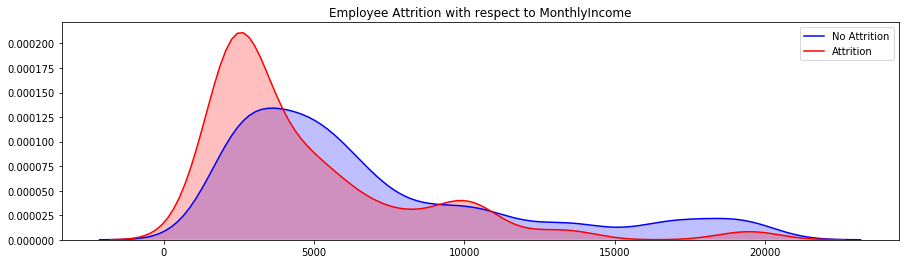

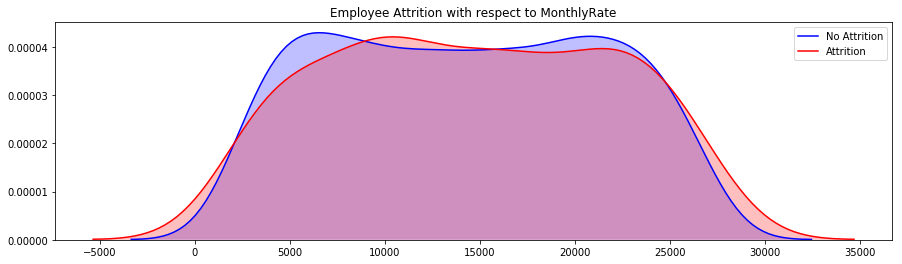

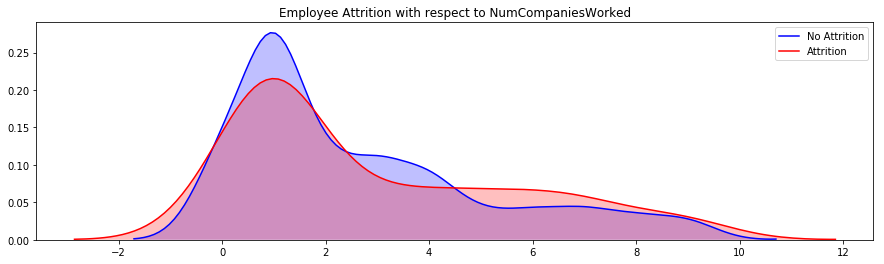

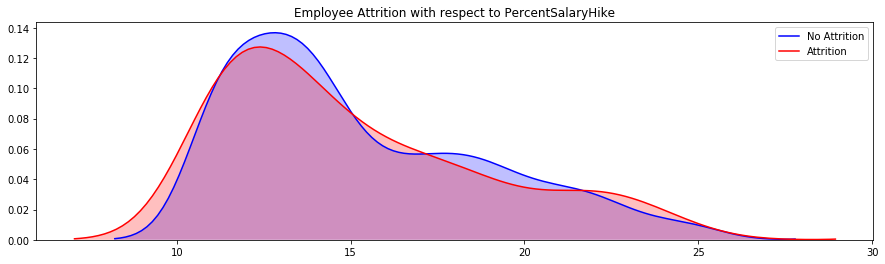

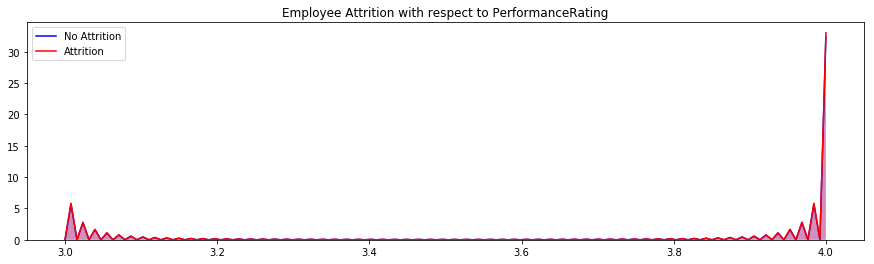

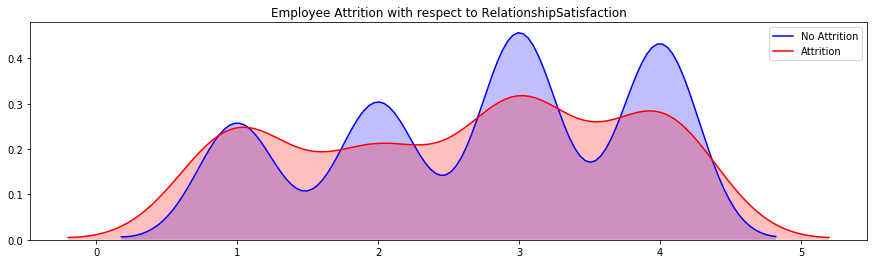

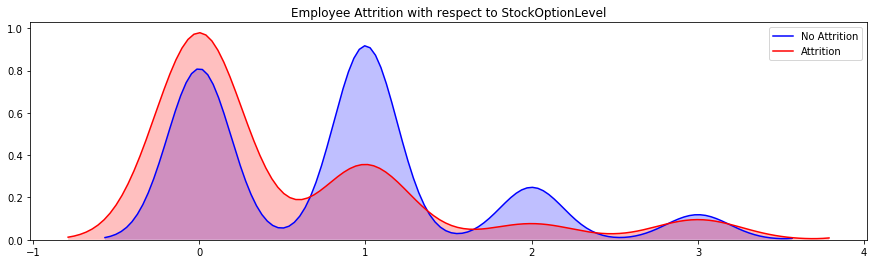

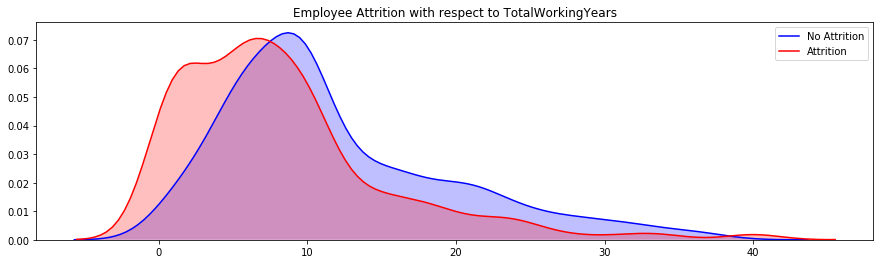

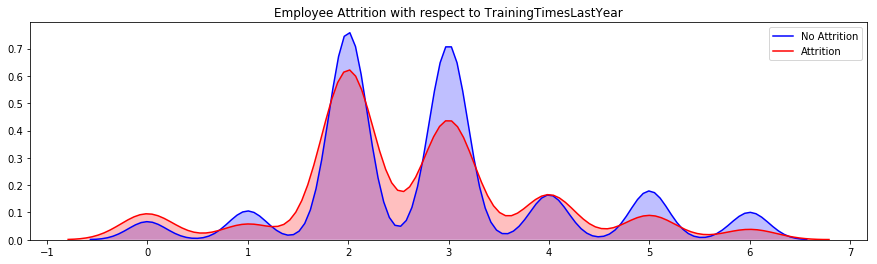

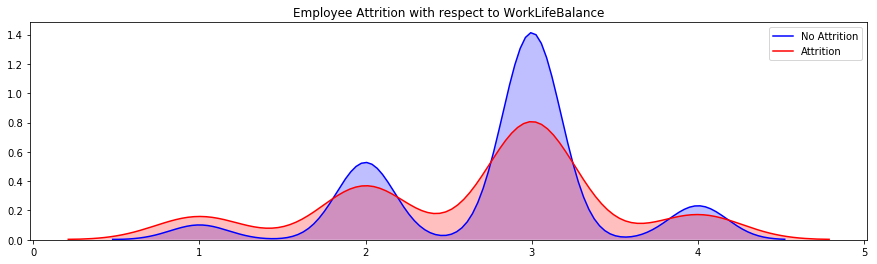

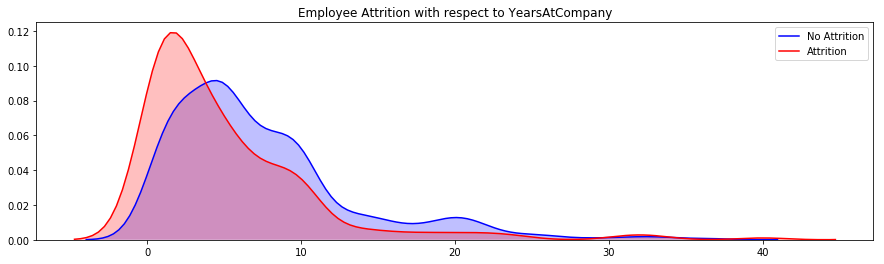

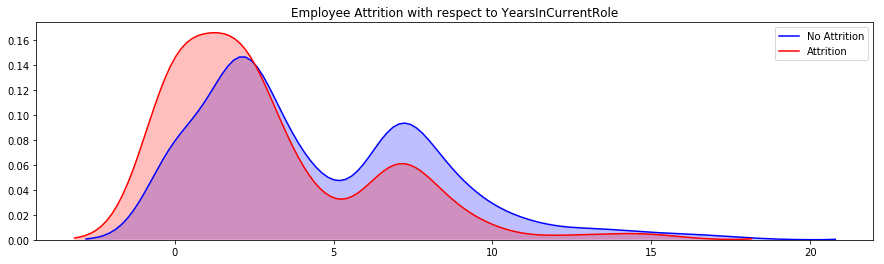

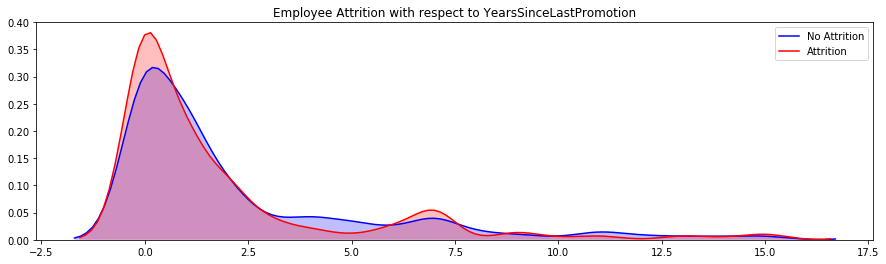

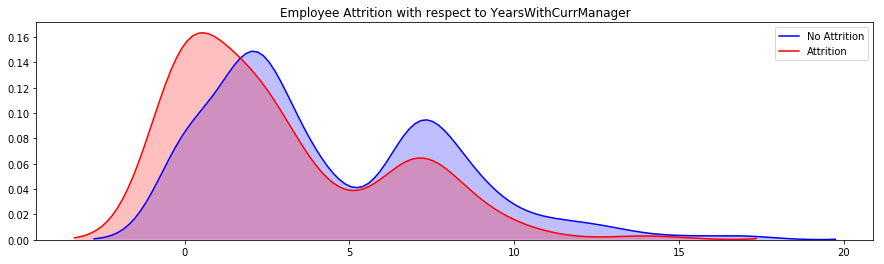

In [12]:
# plot variables as kde plots

def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'No'),var] , color='b',shade=True, label='No Attrition') 
    ax=sns.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))
    
hr_data_num = hr_data.select_dtypes(include=np.number)
hr_data_numcols = list(hr_data_num.columns)

for n in hr_data_numcols:
    kdePlot(n)    

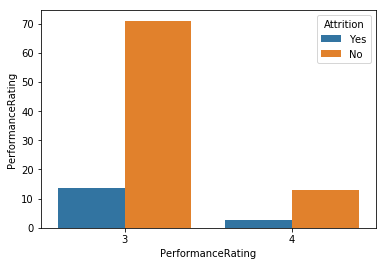

In [13]:
# what's strange about performance rating density plot?
sns.barplot(x="PerformanceRating", y="PerformanceRating", hue="Attrition", data=hr_data, estimator=lambda x: len(x) / len(hr_data) * 100)

# only two categories exist, 3 or 4! i.e not numeric

From the density plots that show the largest difference between attrition and no attrition the variables that stand out are job level and monthly rate. They both have higher probability of attrition at lower values of job level and monthly rate. Monthly rate is also skewed to the left, which explains why the mean of attrition was lower than no attrition. Finally we look at the distibution of categorical variables.

In [14]:
# crosstabs of categorical variables
hr_data_cat = hr_data.select_dtypes(exclude=np.number)
hr_data_catcols =list(hr_data_cat.columns)

for n in hr_data_catcols:
    print(pd.crosstab(hr_data['Attrition'],hr_data[n],normalize='columns'))
    


Attrition   No  Yes
Attrition          
No         1.0  0.0
Yes        0.0  1.0
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                    0.92           0.750903       0.850431
Yes                   0.08           0.249097       0.149569
Department  Human Resources  Research & Development     Sales
Attrition                                                    
No                 0.809524                0.861602  0.793722
Yes                0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  ...     Other  Technical Degree
Attrition                                       ...                            
No                     0.740741       0.853135  ...  0.865854          0.757576
Yes                    0.259259       0.146865  ...  0.134146          0.242424

[2 rows x 6 columns]
Gender       Female      Male
Attrition                    
No         0.852041  0.829

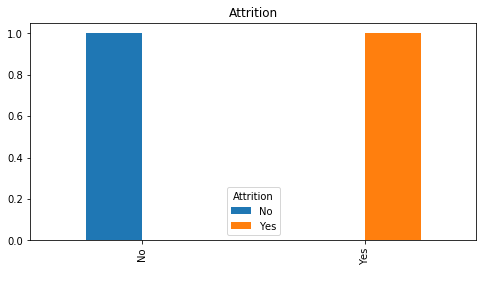

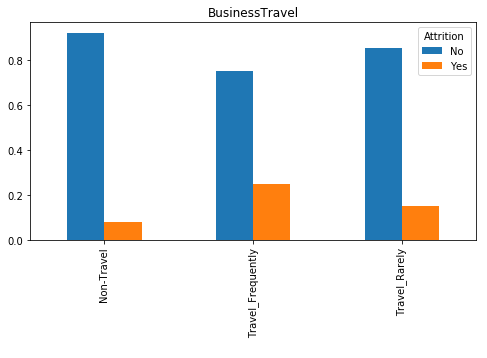

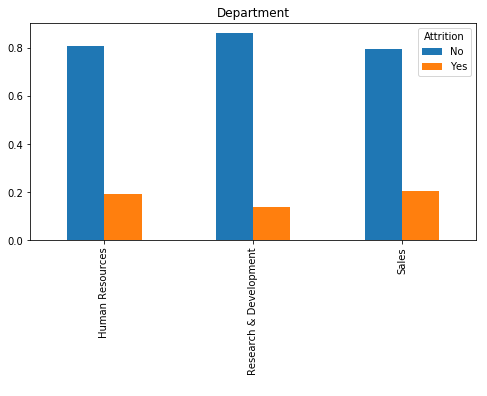

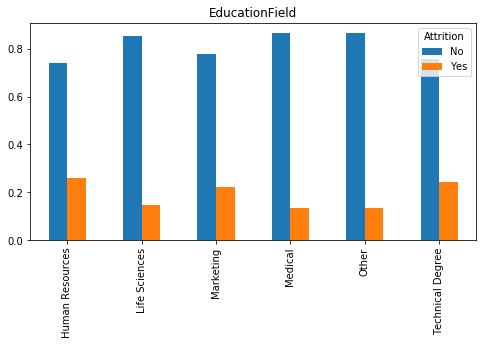

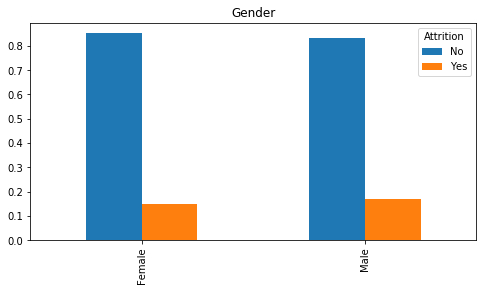

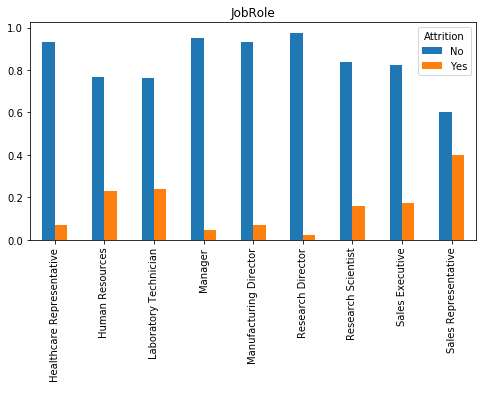

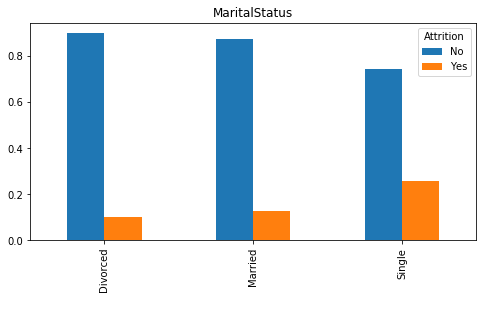

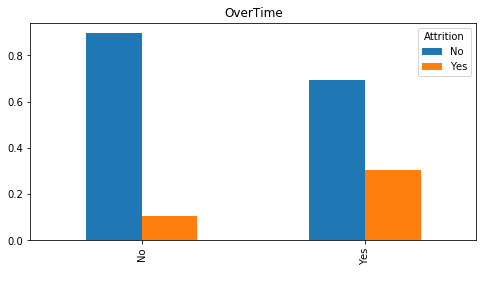

In [15]:
# plot the cross tabs in bar charts

def Bar_plots(var):
    col=pd.crosstab(hr_data_cat[var],hr_data_cat.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
    plt.xlabel(" ")
    plt.title(format(var))
    
for n in hr_data_catcols:
  Bar_plots(n)

Trends in data exploration:

- Low job satisfaction and monthly income have higher attrition
- Those who worked overtime and those who are sales representatives have higher attrition

Will these factors influence attrition in modelling? Let's look to see if any of the variables are correlated using a correlation plot.

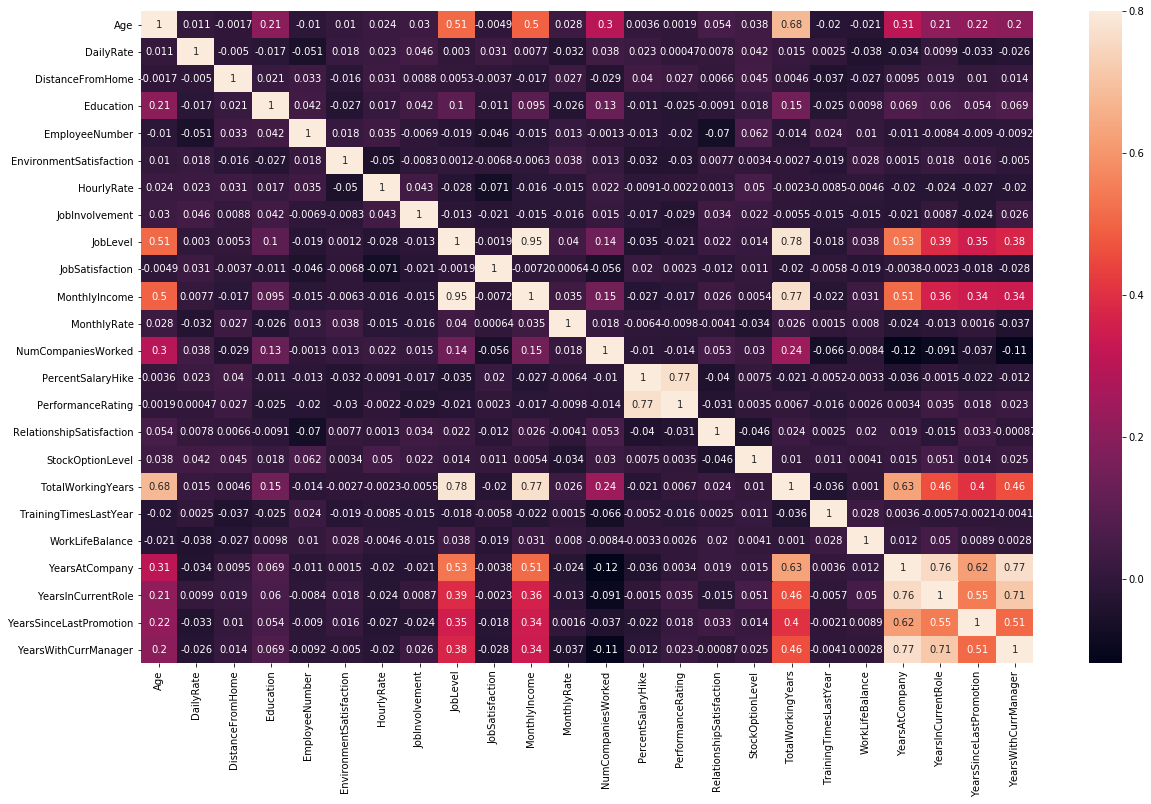

In [16]:
# corrplot of variables
corr_matrix = hr_data.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

Looks like 'monthly income', 'job level' and 'total working years' are highly correlated. The last four variables also have correlation. To avoid unwanted skewing of results for logistic regression, it is best to remove correlated variables. We will remove 'total working years', 'monthly income', 'years in current role', 'years since last promotion' and 'years with current manager'.

In [17]:
# drop the correlated variables
hr_data=hr_data.drop(['TotalWorkingYears', 'MonthlyIncome', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,0,1,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,No,23,4,4,1,3,3,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Yes,15,3,2,0,3,3,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Yes,11,3,3,0,3,3,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,No,12,3,4,1,3,3,2


# Methodology
**Methodology: implement algorithms, build and train data models (300)**

To predict attrition we will be using two different algorithms or methods. The first is logistic regression which is commonly used to classify a binary output. Our binary output here is 1 for "Attrition_Yes" and 0 otherwise (no attrition) for each individual in the dataset. The second algorthim will be a random forest which has the potential to perform better than logistic regression due to the ability to tune parameters to improve model fit. Random forest's predictive power is also less affected by multicollinear varibles. From the random forest we can also produce a variable importance plot which shows the ranking of variable importance to the model and hence which variables best predict attrition.

Individual model performance will be assessed using several metrics. These are precision, recall, f1-score, and an evaluation of the confusion matrix. The performance of each model will be compared using ROC and AUC scores. The higher the value (the closer it is to 1), the better the model. Accuracy is another common measure, but not a good measure here as it doesn't account for false positive and false negative classifications. In this business case, we care greatly about false negatives. For example, if we classify a person as not leaving, but they then leave the company (false negative), this is more costly to the company than if we classified a person as leaving who then stayed (false positive). 


Before the data is split into training and testing sets, the categorical variables are converted into dummy variables. An 80/20 train test split will be used.


In [18]:
# dummify the categorical data
# make a copy of the data
hr_data_num = hr_data.select_dtypes(include=np.number)
hr_data_dummies = pd.get_dummies(hr_data_cat, drop_first = True)
hr_data_mod = pd.concat([hr_data_dummies, hr_data_num], axis=1)
hr_data_mod.head()



,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,2,94,3,2,4,19479,8,11,3,1,0,0,1,6
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,2,3,61,2,2,2,24907,1,23,4,4,1,3,3,10
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,4,92,2,1,3,2396,6,15,3,2,0,3,3,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,5,4,56,3,1,3,23159,1,11,3,3,0,3,3,8
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,7,1,40,3,1,2,16632,9,12,3,4,1,3,3,2


In [0]:
# create x and y datasets
y=hr_data_mod.Attrition_Yes
X=hr_data_mod.drop(['Attrition_Yes'], axis=1)


#Splitting Data in Train and Test Set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [0]:
# function to run chosen algorithm over data and return results
def model(model,model_name,x_tr,y_tr,x_te,y_te):
    model.fit(x_tr,y_tr)
    pred_dt=model.predict(x_te)
    print("     ",model_name,"      ")
    print("ROC_AUC  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_te))

In [21]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model(lr,"Logistic Regression",X_train,y_train,X_test,y_test)

      Logistic Regression       
ROC_AUC   0.8377988127707364
Confusion Matrix  
 [[242  29]
 [  5  18]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       271
           1       0.38      0.78      0.51        23

    accuracy                           0.88       294
   macro avg       0.68      0.84      0.72       294
weighted avg       0.93      0.88      0.90       294



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The logistic model does a fairly good job in predicting the 0 class (no attrition) but a poorer job predicting the 1 class. This could be due to a class imbalance where the 1 class is much smaller than the 0 class. If the data is skewed in this way, the model finds it harder to differentiate the classes as the majority class overpowers the minority class. The account for this, we can use the `class_weight = "balanced"` parameter which will weight the minortiy class to be just as important as the majority class. 

In [22]:
# use class_weight to balance the classes
lr_bal = LogisticRegression(class_weight = "balanced")

model(lr_bal,"Logistic Regression",X_train,y_train,X_test,y_test)

# there is improvement in the prediction of class 1 - attrition_yes


      Logistic Regression       
ROC_AUC   0.6351329131268841
Confusion Matrix  
 [[189  16]
 [ 58  31]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       205
           1       0.66      0.35      0.46        89

    accuracy                           0.75       294
   macro avg       0.71      0.64      0.65       294
weighted avg       0.73      0.75      0.72       294



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The precision for class 0 has decreased slightly but it has increased for class 1. The random forest is performed next, returning an ROC_AUC score higher than logstic regression at 0.92. The `n_estimators` and `max_depth` parameters were chosen to give the best trade off between performance and efficency.

In [54]:
# implement random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,max_depth=5, random_state = 42)
model(rf,"Random Forest",X_train,y_train,X_test,y_test)

      Random Forest       
ROC_AUC   0.9243986254295532
Confusion Matrix  
 [[247  44]
 [  0   3]]
                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       291
           1       0.06      1.00      0.12         3

    accuracy                           0.85       294
   macro avg       0.53      0.92      0.52       294
weighted avg       0.99      0.85      0.91       294



No false negatives were classified. However only 1 class 1 was correctly classified, with 46 false positives. This result is ideal for the business case, however this prediction is not realistic as we could be overfitting. The model may not perform well on another unseen dataset, or on a larger scale. We will try adding the class_weight parameter and run the model again. 

In [55]:
# balance the class weights
rf_bal=RandomForestClassifier(n_estimators=1000,max_depth=5, random_state = 42, class_weight = "balanced")
model(rf_bal,"Random Forest",X_train,y_train,X_test,y_test)

      Random Forest       
ROC_AUC   0.7116920842411039
Confusion Matrix  
 [[222  21]
 [ 25  26]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       243
           1       0.55      0.51      0.53        51

    accuracy                           0.84       294
   macro avg       0.73      0.71      0.72       294
weighted avg       0.84      0.84      0.84       294



Higer precision score for class 1, but the amount of false negatives is 25.

With the balancing of class weights both algorithms returned lower ROC_AUC scores at around 0.6~0.7, even though they classified the minority class slightly better. Another method of dealing with class imblance is the SMOTE method (Sample Minority Oversampling Technique). SMOTE creates synthetic samples of the minority class, within the boundaries of the minority class, to increase the proportion to 50/50 of each class. This gives the model a better chance of classifying the data without the majority class overpowering the minority.

In [0]:
# import smote from imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_os, y_os = smote.fit_sample(X,y)
# create new oversampled training and test sets
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.2,random_state=100)


In [57]:
# logistic Regression for oversampled Data 
lr_os=LogisticRegression()
model(lr_os,"Logistic Regression",X_train_os,y_train_os,X_test_os,y_test_os)

      Logistic Regression       
ROC_AUC   0.8984991643638409
Confusion Matrix  
 [[233  38]
 [ 14 209]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       271
           1       0.85      0.94      0.89       223

    accuracy                           0.89       494
   macro avg       0.89      0.90      0.89       494
weighted avg       0.90      0.89      0.89       494



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [58]:
# RF for oversampled Data
rf_os=RandomForestClassifier(n_estimators=1000,max_depth=5, random_state = 42)
model(rf_os,"Random Forest",X_train_os,y_train_os,X_test_os,y_test_os)

      Random Forest       
ROC_AUC   0.8927741616544451
Confusion Matrix  
 [[229  36]
 [ 18 211]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       265
           1       0.85      0.92      0.89       229

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



Interestingly the random forest performed slightly worse than the logistic regression on the oversampled dataset. However, with random forest the model parameters can be adjusted to gain a better model fit. After some adjustments to `max_depth` of trees, a slightly higher ROC_AUC than logistic regression of 0.93 is achieved.

In [32]:
# RF for oversampled Data
rf_os=RandomForestClassifier(n_estimators=1000,max_depth=11, random_state = 42)
model(rf_os,"Random Forest",X_train_os,y_train_os,X_test_os,y_test_os)

# increased the number of trees to 1000, max depth of trees from 4 to 11, increases ROC_AUC

      Random Forest       
ROC_AUC   0.9285021294788943
Confusion Matrix  
 [[236  25]
 [ 11 222]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       261
           1       0.90      0.95      0.93       233

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



From the variable importance plot below, the most important feature in the random forest model is overtime = Yes, the years at a company and job level.

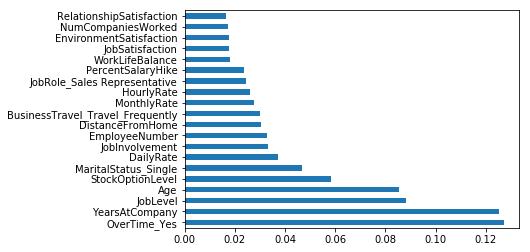

In [36]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Evaluation

A table comparing the ROC_AUC scores is shown below. Both models performed well and to a simliar degree, with random forest only performing slightly better than the logistic regression. Using oversampled training data improved the logistic regressiom model, but made no noticable difference to the random forest performance. Oversampling was a better method to deal with class imbalance in the data. 

The top 3 variables that contributed to attrition in the variable importance plot align with the exploration of the data. It is logical that a person who works overtime, for a long period of time would be less likely to stay in their job, and it could also lead to a shortened working life overall. The amount of year spent at the company is a double edged sword, on one hand if you spent less time there you would have left the comapny early as you did not want to or could not work there anymore. On the other hand you could have spent a long time at the company and are retiring from work altogether. If we look back at the density plot of this variable in the exploration section, it shows that younger people around age 30 are more likely to leave. This could signify that at a certain point, career progression in the company is lacking, and those employees are looking elsewhere for growth. As seen in the exploration, low job level is attributed to high attrition, possibly another indicator of poor career progression opportunities.

**Evaluation: Report exectution on data,perform and report on testing, perform effciency analysis, do possible comparative study (200)**

In [60]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'ROC_AUC']),
                 cells=dict(values=[["Logistic regression - unbalanced", "Logistic regression - balanced", "Logistic regression - oversampled", "Random forest - unbalanced", "Random forest - balanced", "Random forest - oversampled", "Random forest - tuned"],
                                    [0.837, 0.635, 0.924, 0.711, 0.898, 0.892, 0.928]]))
                     ])
fig.show()

# Conclusion

**Conclusion: discuss reflections, propose possible improvements (100)**

This study developed a model to predict attrition in a comapny using a synthetic HR dataset. Two algorithms were implemented and compared, and variables of importance were highlighted. The algorithms chosen were suitable for the task and they performed quite well. Ways to improve the modelling in the study would be to investigate further parameter tuning in the random forest, and also perform cross validation. Some of the variables could also be transformed for ease of interpretability, for example the work-life balance variable could be transformed to yes or no, and the distance from home could be 'close' or 'far'. Other methods such as AdaBoost or XGBoost could also be used. 





# Ethics


**Ethics: identify and discuss ethical issues with project/technique, highlight potential misuse (200)**

This analysis could greatly influence decision makers in HR and result in wide ranging effects across all sections of a company. It takes many people to address underlying issues in a company, and can involve a lot of time and money spent. If the analysis isn't accurate then any insights from it could unintentionally steer the comapny in the wrong direction. Falsely predicting employees staying when they don't can negatively affect the financial stability of the comapny. 

People can also take advantage of this if they have alterior motives. One way that can manifest is if the result are used to target individuals. The data contains highly sensitive and identifying information and treating each prediction individually can be seen as discriminatory. If somebody hears that they are targeted as being prone to attrittion, that may ruin chances of retaining that employee. The results from the study can be used to inform strategies of addressing attrittion, not to be used to target individuals.



## References

[1] Australian Bureau of Statistics (ABS), MEDIA RELEASE, "*More than one million Australians change jobs*", 9 August 2018, viewed online 14/09/2019, accessible at:
https://www.abs.gov.au/AUSSTATS/abs@.nsf/mediareleasesbyReleaseDate/ECD41B59F9627755CA2582E300192E1F?OpenDocument

[2] Linkedin, Josh Bersin, *Employee Retention Now a Big Issue: Why the Tide has Turned*, 16 August 2013, viewed online 15/09/2019, accessible at: https://www.linkedin.com/pulse/20130816200159-131079-employee-retention-now-a-big-issue-why-the-tide-has-turned/?irgwc=1